In [8]:
import matplotlib.pyplot as plt
from plotting_functions.plotting_structure import combine_experiments
from plotting_functions.boxplots import boxplot_at_molt, boxplot_larval_stage
import warnings
# Configure warnings
warnings.filterwarnings("once")

In [9]:
filemap_paths = [
    "/mnt/towbin.data/shared/kstojanovski/20240202_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240202_171239_051/analysis_sacha/report/analysis_filemap_annotated.csv",
    "/mnt/towbin.data/shared/kstojanovski/20240212_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240212_164059_429/analysis_sacha/report/analysis_filemap_annotated.csv",
]

conditions_paths = [
    "/mnt/towbin.data/shared/kstojanovski/20240202_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240202_171239_051/doc/conditions.yaml",
    "/mnt/towbin.data/shared/kstojanovski/20240212_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240212_164059_429/doc/conditions.yaml",
]

organ_channels = [{'body': 'ch2', 'pharynx' : 'ch1'}]
# 

# backup_path = "/mnt/towbin.data/shared/igheor/20250208_Ti2_10x_suppressor_screen_daf16_160_186_344_338_25C_20250208_204911_158/plotting_backups/"

# filemap_backup_path = os.path.join(backup_path, "filemaps")
# conditions_backup_path = os.path.join(backup_path, "conditions")
# structure_backup_path = os.path.join(backup_path, "structure")

# os.makedirs(backup_path, exist_ok=True)
# os.makedirs(filemap_backup_path, exist_ok=True)
# os.makedirs(conditions_backup_path, exist_ok=True)
# os.makedirs(structure_backup_path, exist_ok=True)

In [10]:
import pickle
conditions_struct = combine_experiments(filemap_paths, conditions_paths, organ_channels=organ_channels, recompute_values_at_molt=False)

# # backup the conditions struct
# with open(os.path.join(structure_backup_path, "plotting_struct.pkl"), "wb") as f:
#     pickle.dump(conditions_struct, f)

Initial processing of filemap took 0.85 seconds
Processing condition 0 took 0.64 seconds
Processing condition 1 took 0.53 seconds
Processing condition 2 took 0.61 seconds
Processing condition 3 took 0.63 seconds
Processing condition 4 took 0.59 seconds
Processing condition 5 took 0.76 seconds
Initial processing of filemap took 1.36 seconds
Processing condition 0 took 0.66 seconds
Processing condition 1 took 0.70 seconds
Processing condition 2 took 0.65 seconds
Processing condition 3 took 0.59 seconds
Processing condition 4 took 0.69 seconds
Processing condition 5 took 0.64 seconds
Condition info: {'strain': 'wBT160'}
Condition info: {'strain': 'wBT186'}
Condition info: {'strain': 'wBT310'}
Condition info: {'strain': 'wBT337'}
Condition info: {'strain': 'wBT380'}
Condition info: {'strain': 'wBT393'}
Condition info: {'strain': 'wBT160'}
Condition info: {'strain': 'wBT186'}
Condition info: {'strain': 'wBT310'}
Condition info: {'strain': 'wBT337'}
Condition info: {'strain': 'wBT380'}
Condi

In [11]:
for condition in conditions_struct:
    print(f"Condition: {condition['condition_id'], {condition['description']}}, Number of individuals: {condition['ecdysis_time_step'].shape[0]}")

Condition: (0, {'WT yap-1, no TIR, 500uM IAA'}), Number of individuals: 58
Condition: (1, {'WT yap-1, col-10:TIR, 500uM IAA'}), Number of individuals: 55
Condition: (2, {'yap-1 (tm1416), no TIR, 500uM IAA'}), Number of individuals: 79
Condition: (3, {'yap-1 (tm1416), col-10:TIR, 500uM IAA'}), Number of individuals: 76
Condition: (4, {'yap-1 (abt7), no TIR, 500uM IAA'}), Number of individuals: 99
Condition: (5, {'yap-1 (abt7), col-10:TIR, 500uM IAA'}), Number of individuals: 155


In [12]:
# change figure size to your liking
plt.rcParams['figure.figsize'] = [12, 10]

# make lines thicker
plt.rcParams['lines.linewidth'] = 2

# make font size bigger
plt.rcParams.update({'font.size': 12})

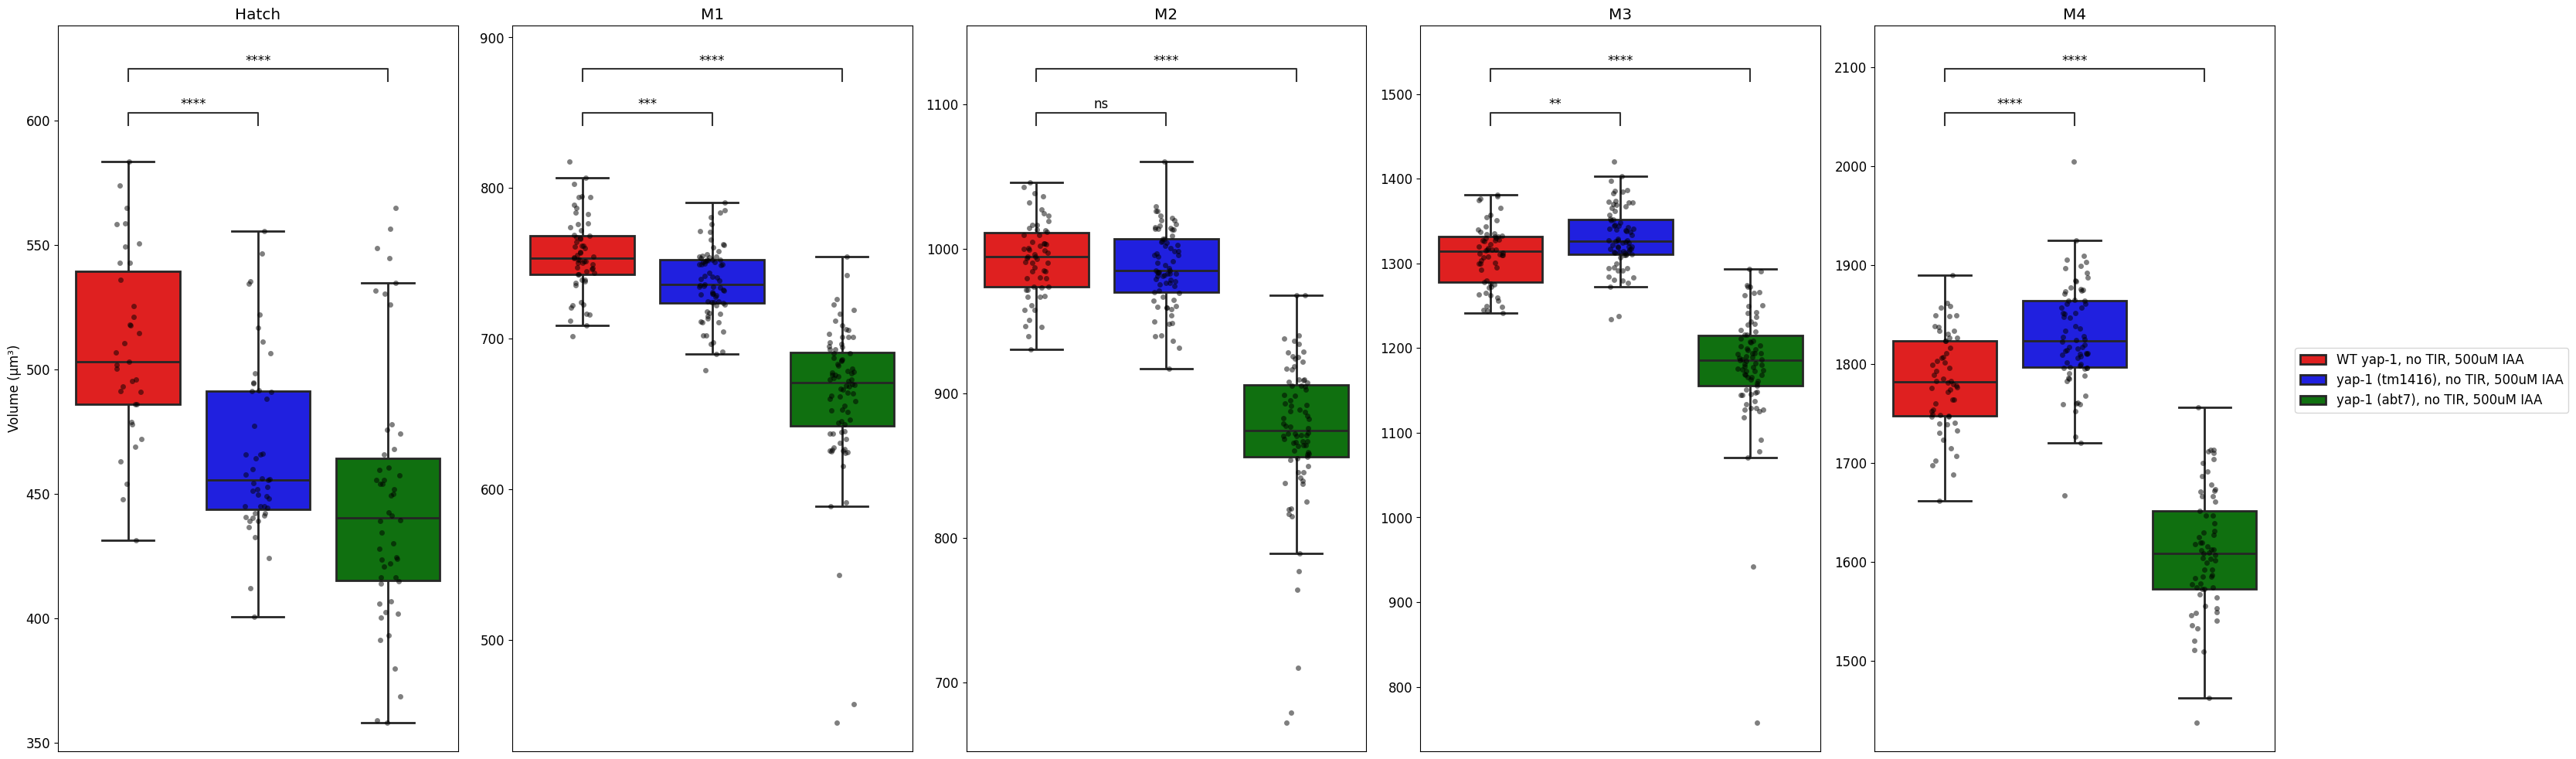

In [13]:
conditions_to_plot = [0, 2, 4]
significance_pairs = [(0, 2), (0,4)]
colors = {0: 'red', 2: 'blue', 4: 'green',}
# colors = ['red', 'blue', 'green']

fig = boxplot_at_molt(conditions_struct, 'pharynx_seg_str_volume_at_ecdysis', conditions_to_plot, colors=colors, plot_significance=True, significance_pairs = significance_pairs, log_scale = False, legend = {'description': ''}, y_axis_label='Volume (µm³)', titles = ['Hatch', 'M1', 'M2', 'M3', 'M4'])

/home/spsalmon/towbintools_pipeline/analysis_and_plots/plotting_functions/boxplots.py:311: RuntimeWarning: All-NaN slice encountered
  aggregated_data_of_stage = np.nanmedian(data_of_stage, axis=1)


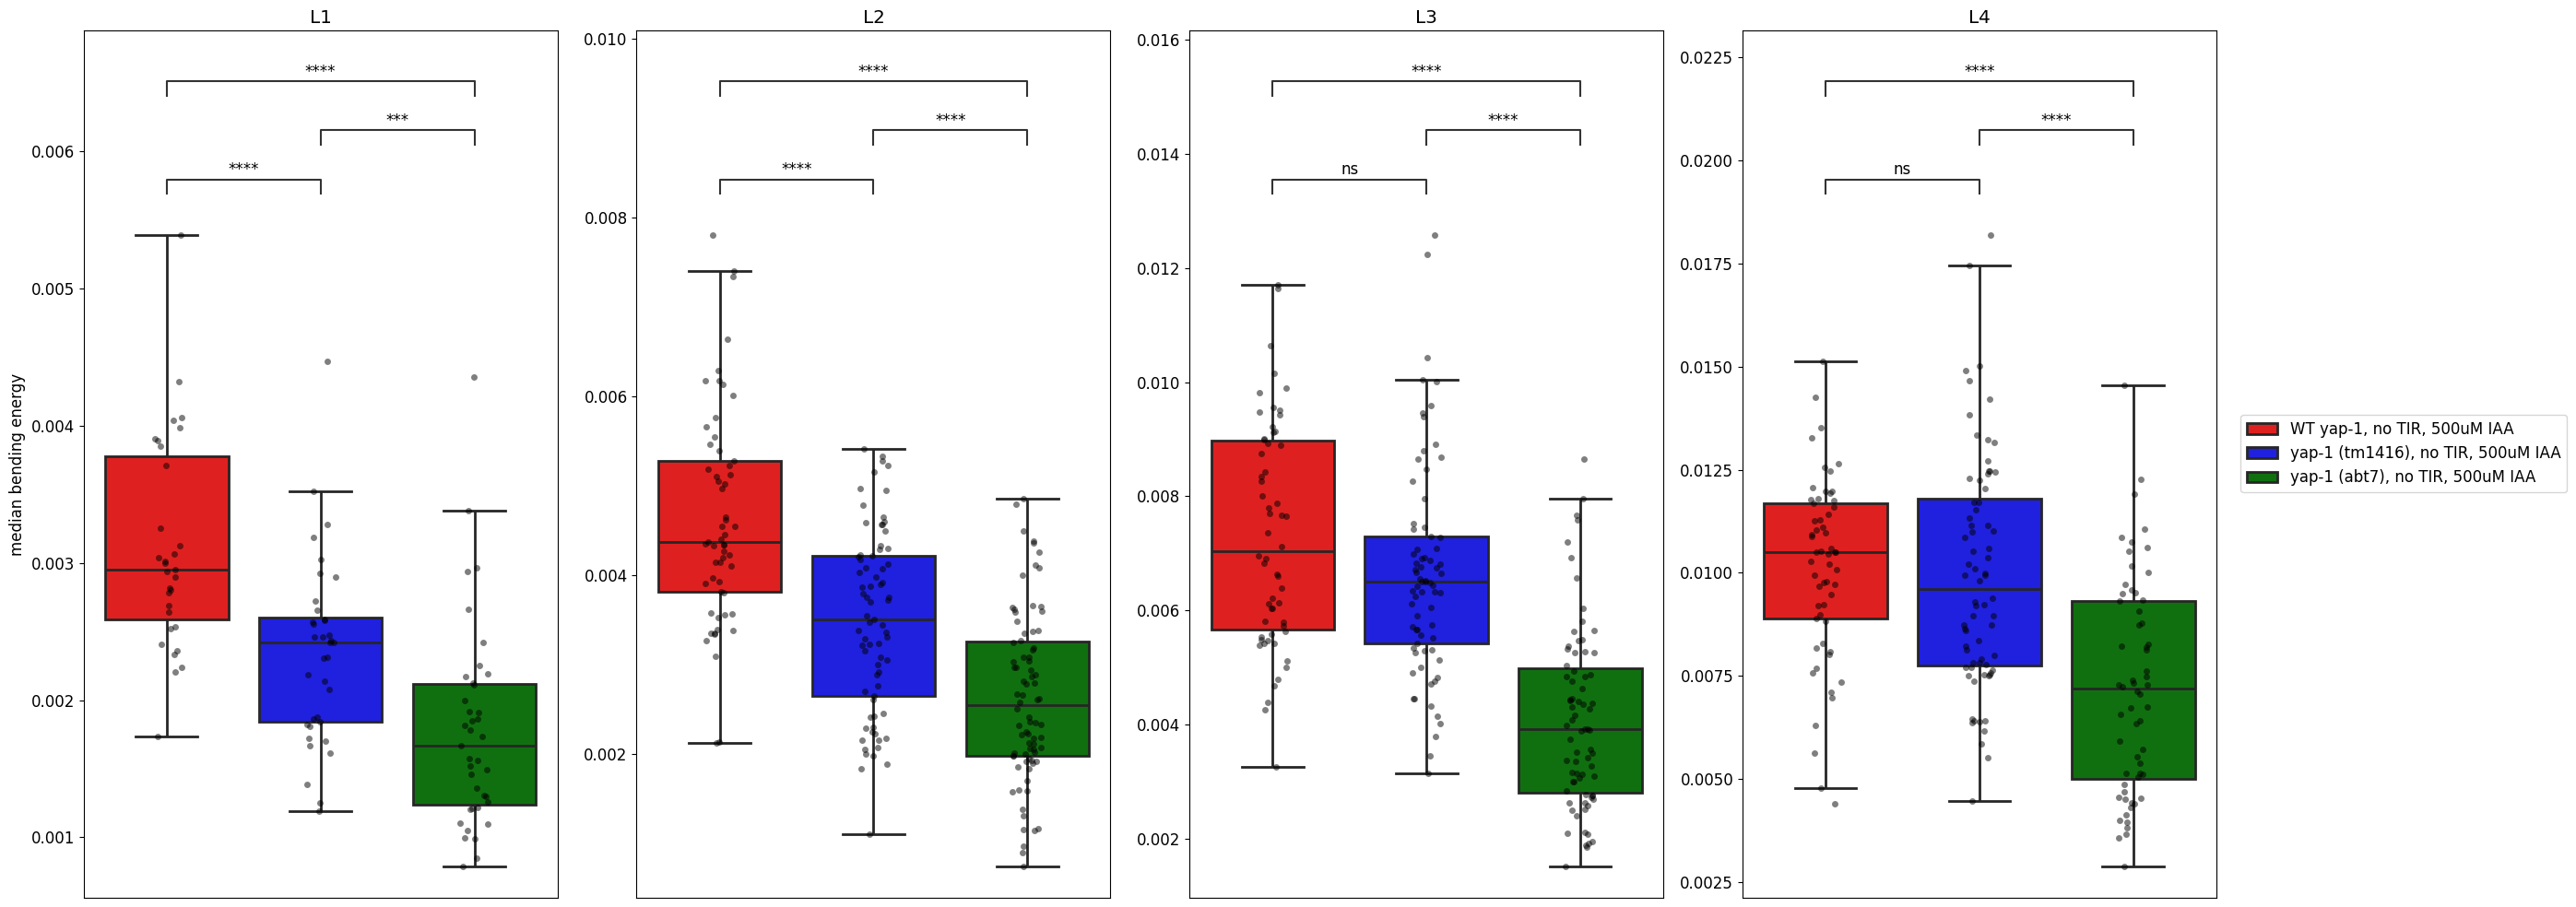

In [14]:
fig = boxplot_larval_stage(conditions_struct, 'pharynx_seg_bending_energy', conditions_to_plot, colors=colors, aggregation='median', n_points=100, log_scale=False, plot_significance=True, y_axis_label='median bending energy', titles = ['L1', 'L2', 'L3', 'L4'], legend={'description': ''})